In [9]:
#python3.6
import jieba
jieba.set_dictionary('dict.txt.big')  # 如果是使用繁體文字，請記得去下載繁體字典來使用
with open('stops.txt', 'r', encoding='utf8') as f:  # 中文的停用字，我也忘記從哪裡拿到的，效果還可以，繁體字的資源真的比較少，大家將就一下吧
    stops = f.read().split('\n') 

In [10]:
##hhttps://news.cnyes.com/news/id/4664237
##理專兩年詐客戶2億元 豪賭期貨運彩 落網只剩40萬
#https://www.chinatimes.com/realtimenews/20210622005997-260410?chdtv
#中信理專兩年詐28名客戶近2億元 被起訴


testStr = """
中信理專兩年詐28名客戶近2億元 被起訴
理專兩年詐客戶2億元 豪賭期貨運彩 落網只剩40萬
中信金 (2891-TW) 旗下中國信託南中壢分行 41 歲的管姓理專涉嫌從 2017 年起至 2019 年間謊稱提供優惠投資方案，向 28 名客戶詐得近 2 億元，用於玩期貨、下注運彩，落網時贓款只剩 40 萬元，全案依詐欺、洗錢防制法等罪起訴。
對此，中國信託表示，本案為該名理專私下與客戶疑有不當資金往來，並涉及私人投資糾紛，該行主動發現後立即通報主管機關，並主動向警方報案。

中國信託進一步表示，對該名理專不當行為，該行深表歉意，為保障客戶權益，已主動聯繫可能受影響的客戶，並與檢警單位密切合作並全力協助偵辦，該行一向重視客戶權益保障，將以負責任的態度檢視相關作業流程，並強化各項監控及控管機制。


理專A錢案又驚爆一樁！中國信託商業銀行南中壢分行行員因投資期貨指數頻頻虧損，涉嫌從2017年起至2019年間向28名客戶詐得近2億元，用於玩期貨、下注運彩，落網時贓款只剩40萬元。金管會銀行局官員指出，該案為舊案，6月22日檢調已依詐欺、違反洗錢防制法等罪起訴，現已請中信銀行提出陳述意見，後續將依照調查的結果進行相關的行政處分。
近年理專A錢案層出不窮，2020年全年就有5家銀行因為理專A錢案被裁罰，裁罰金額高達7200萬元，而理專挪用的金額共有3.36億元，雙雙創下歷史新高紀錄，2021年理專挪用金額動輒破億元，罰金與挪用金額都恐再創新高。
據檢警調查，41歲的管男因自行投資期貨指數頻頻虧損，涉嫌鋌而走險從2017年起至2019年間向客戶誆稱銀行有好的投資方案或保險及黃金理財方案，可獲利年利率5％至6％，但須透過他人帳戶投資，詐取28名客戶匯款至管男指定的帳戶，全案因為其中一位被害人發現帳戶有異，前往銀行理論而東窗事發，經銀行調查後報案。

中國信託表示，本案為該名理專私下與客戶疑有不當資金往來，並涉及私人投資糾紛，該行主動發現後立即通報主管機關，並主動向警方報案。

中國信託進一步表示，對該名理專不當行為，該行深表歉意，為保障客戶權益，已主動聯繫可能受影響的客戶，並與檢警單位密切合作並全力協助偵辦，該行一向重視客戶權益保障，將以負責任的態度檢視相關作業流程，並強化各項監控及控管機制。
"""

In [3]:
import re
import os
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [4]:
punc = "[【】╮╯▽╰╭★→「」！，❤。～《》：()／（）”“；：、！：，。？、~@#￥%……&*]+"

token = " ".join(jieba.cut(testStr,cut_all=False))
# 移除停用字
token = " ".join([term for term in token.split() if term not in stops])
# 移除標點符號
token = re.sub(punc, "", token)
terms = [term for term in token.split(' ') if term != '' and len(term)>1]

Building prefix dict from /Users/z/Desktop/金融伦理/dict.txt.big ...
Loading model from cache /var/folders/q9/0yjtkz2x1mq4f7qlvql797l80000gn/T/jieba.ueb5c54704179a2a2b6ffb8fa4bf2468c.cache
Loading model cost 2.137 seconds.
Prefix dict has been built successfully.


In [5]:
# 使用Counter統計文字及頻率數，並排序列出
total_terms=sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)

In [6]:
dict(total_terms)

{'客戶': 28,
 '投資': 16,
 '主動': 13,
 '理專': 11,
 '中國信託': 11,
 '該行': 11,
 '銀行': 10,
 '億元': 9,
 '保障': 9,
 '權益': 9,
 '不當': 8,
 '表示': 7,
 '名理': 7,
 '28': 6,
 '發現': 6,
 '報案': 6,
 '金額': 6,
 '私下': 5,
 '糾紛': 5,
 '警方': 5,
 '檢警': 5,
 '全力': 5,
 '相關': 5,
 '強化': 5,
 '監控': 5,
 '控管': 5,
 '機制': 5,
 '中信銀行': 5,
 '帳戶': 5,
 '中信': 4,
 '涉嫌': 4,
 '2017': 4,
 '2019': 4,
 '年間': 4,
 '方案': 4,
 '期貨': 4,
 '疑有': 4,
 '資金': 4,
 '往來': 4,
 '涉及': 4,
 '私人': 4,
 '立即': 4,
 '通報': 4,
 '主管機關': 4,
 '行為': 4,
 '深表歉意': 4,
 '聯繫': 4,
 '可能': 4,
 '影響': 4,
 '並與': 4,
 '單位': 4,
 '密切合作': 4,
 '協助': 4,
 '偵辦': 4,
 '一向': 4,
 '重視': 4,
 '將以': 4,
 '負責': 4,
 '態度': 4,
 '檢視': 4,
 '作業': 4,
 '流程': 4,
 '各項': 4,
 '起訴': 3,
 '落網': 3,
 '40': 3,
 '運彩': 3,
 '萬元': 3,
 '進一步': 3,
 '錢案': 3,
 '虧損': 3,
 '該案': 3,
 '調查': 3,
 '因為': 3,
 '挪用': 3,
 '此案': 3,
 '兩年': 2,
 '中壢': 2,
 '分行': 2,
 '41': 2,
 '管姓': 2,
 '詐得': 2,
 '用於': 2,
 '下注': 2,
 '贓款': 2,
 '全案': 2,
 '詐欺': 2,
 '洗錢': 2,
 '制法': 2,
 '本案': 2,
 '商業銀行': 2,
 '行員': 2,
 '指數': 2,
 '頻頻': 2,
 '22': 2,
 '裁罰': 2,
 '但須': 2,
 '透過':

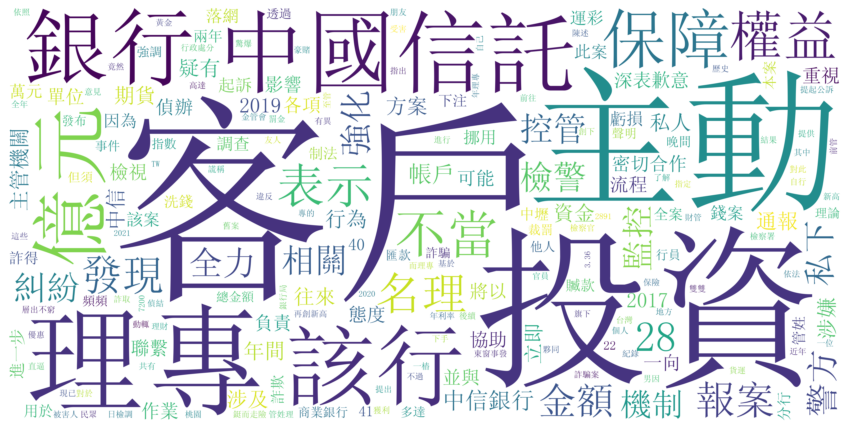

In [7]:
wordcloud = WordCloud(background_color="white",scale=10,font_path="simsun.ttf").generate_from_frequencies(dict(total_terms))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

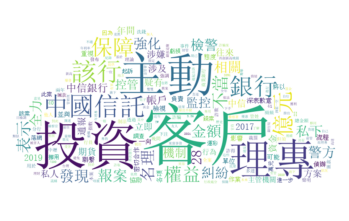

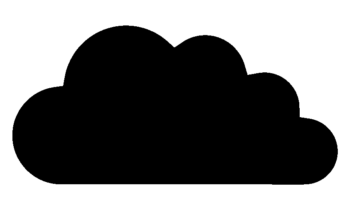

In [8]:
from PIL import Image
import numpy as np
alice_mask = np.array(Image.open("cloud_mask7.png"))
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask, font_path="simsun.ttf")
wc.generate_from_frequencies(Counter(terms))

# store to file
# wc.to_file(path.join(d, "cloud.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()